In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from sklearn.decomposition import PCA

In [30]:
typedic={0:'round-ellip',1:'inbetween-ellip',2:'Cigar-ellip',3:'edgeon-spiral',4:'barred-spiral',5:'unbarred-spirral',6:'irregular',7:'merger'}
colordic={'round-ellip':'#ED004B','inbetween-ellip':"#F500AA",'Cigar-ellip':'#AA0036',
          'edgeon-spiral':'#00d5ff','barred-spiral':'#0090FE','unbarred-spirral':'#0021FF',
          'irregular':'#92F000','merger':'#009125'}
hueorder=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger']
meta=pd.read_csv('/cndd2/jchien/project/transformer/gz2_predictions.csv')
meta.head()

GalaxyID  class  pred_vit  pred_res  vitTresT  vitTresF  vitFresT  \
0        17      0         0         0         1         0         0   
1        20      1         1         1         1         0         0   
2        24      3         3         3         1         0         0   
3        36      5         5         7         0         1         0   
4        49      3         3         3         1         0         0   

   vitFresF            dr7objid    dered_u  ...  modelMag_i  modelMag_z  \
0         0  587722981742084303  19.673649  ...   16.059088   15.693376   
1         0  587722981742215305  18.132294  ...   15.930616   15.669191   
2         0  587722981743067266  19.062454  ...   16.297028   15.943096   
3         0  587722981744115851  20.079730  ...   16.509523   16.134436   
4         0  587722981745295552  17.256195  ...   14.722395   14.406494   

      lnLDeV_r    lnLExp_r  petroR50_r  petroR90_r  dered_g_r  model_g_r  \
0  -116.616010 -2148.49630    3.208182    9.783567   1.127535   1.157339   
1   -15.639699 -1587.02050    2.254702    6.496093   0.649712   0.679811   
2  -254.417700  -378.97885    2.058299    5.655466   0.794344   0.822649   
3  -171.511660 -1629.12650    3.177179    9.275770   1.274666   1.298849   
4 -4681.504400 -1925.91130    9.300726   22.432047   0.723113   0.748410   

   viewed_edge_on  anything_odd  
0        0.000000      0.000000  
1        0.000000      0.000000  
2        0.884189      0.000000  
3        0.000000      0.813391  
4        0.947000      0.120000  

[5 rows x 27 columns]

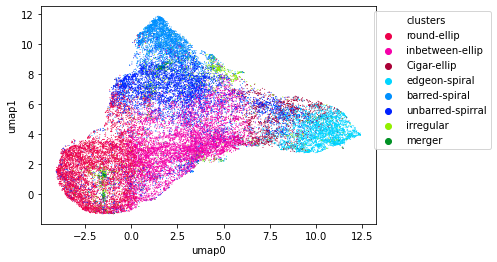

In [12]:
# UMAP
df=pd.read_csv('/cndd2/jchien/project/transformer/lin_test_f128.csv')
data=df.drop(columns=['galaxy_id','label']).values
info=df[['galaxy_id','label']].merge(meta,left_on='galaxy_id',right_on='GalaxyID')
info['cluster']=info['label'].map(typedic)
# embedding = umap.UMAP(n_neighbors=10,n_components=2, metric='euclidean').fit_transform(data)
info['umap0']=embedding[:,0]
info['umap1']=embedding[:,1]
info
# info.to_csv('euclidean_10_umap.csv')

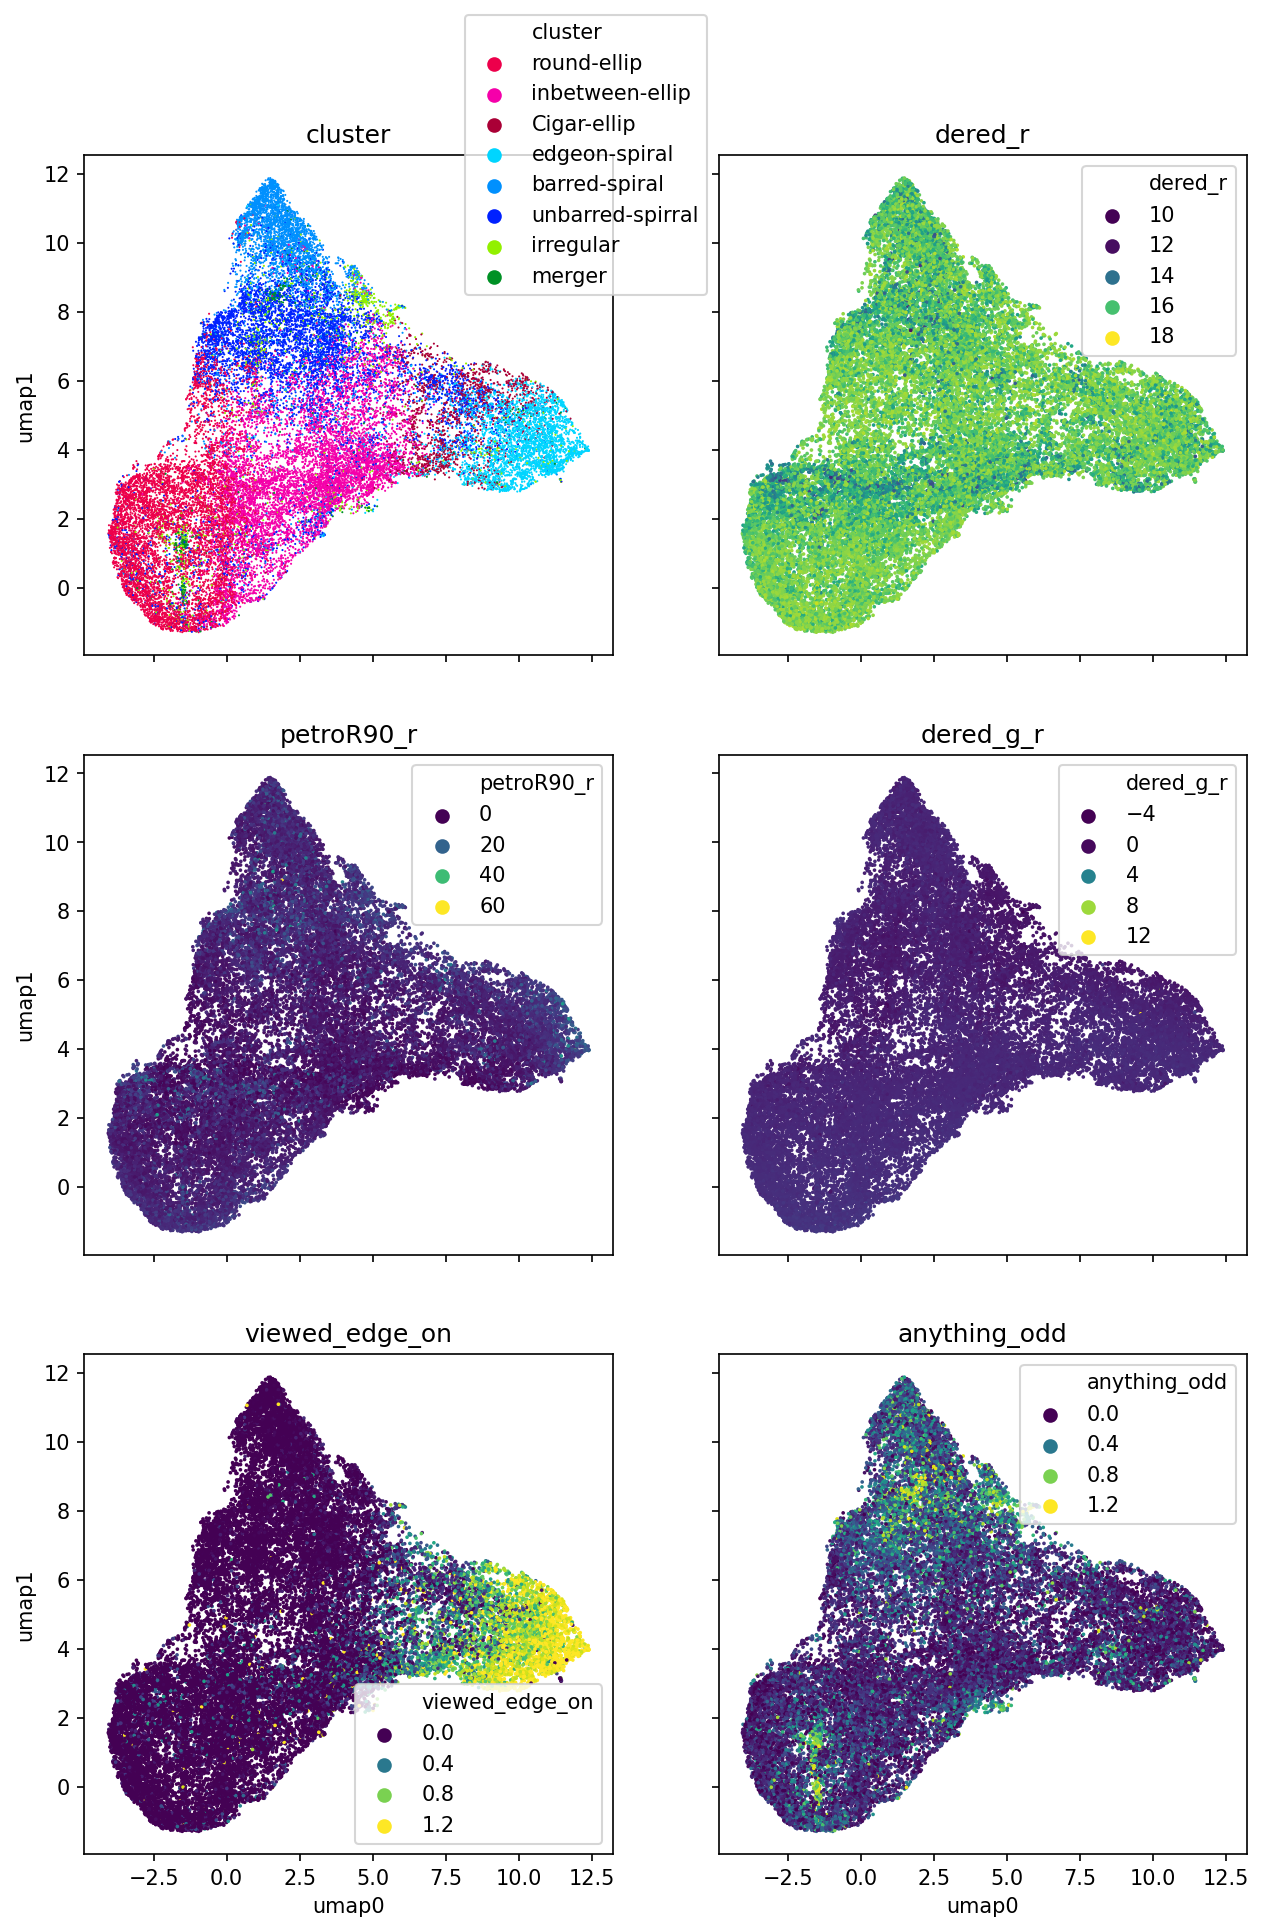

In [104]:
fig,axs=plt.subplots(3,2,figsize=(10,15),dpi=150,sharex=True,sharey=True)
hues=['cluster','dered_r','petroR90_r','dered_g_r','viewed_edge_on','anything_odd']
n=-1
for i in range(3):
    for j in range(2):
        n=n+1
        ax=axs[i,j]
        if (i==0)&(j==0):
            info['dered_r'].div(info['dered_r'].max())
            sns.scatterplot(x='umap0',y='umap1',data=info,hue=hues[n],ax=ax,
                            hue_order=hueorder,linewidth=0,s=1,palette=colordic, legend='full')
            ax.legend(bbox_to_anchor=(0.7, 0.7))
        else:
            sns.scatterplot(x='umap0',y='umap1',data=info,hue=hues[n],ax=ax,s=1,edgecolor=None,palette='viridis')
#             ax.scatter(x=info['umap0'],y=info['umap1'],c=info[hues[n]].div(info[hues[n]].max()),s=1)
        ax.set_title(hues[n])


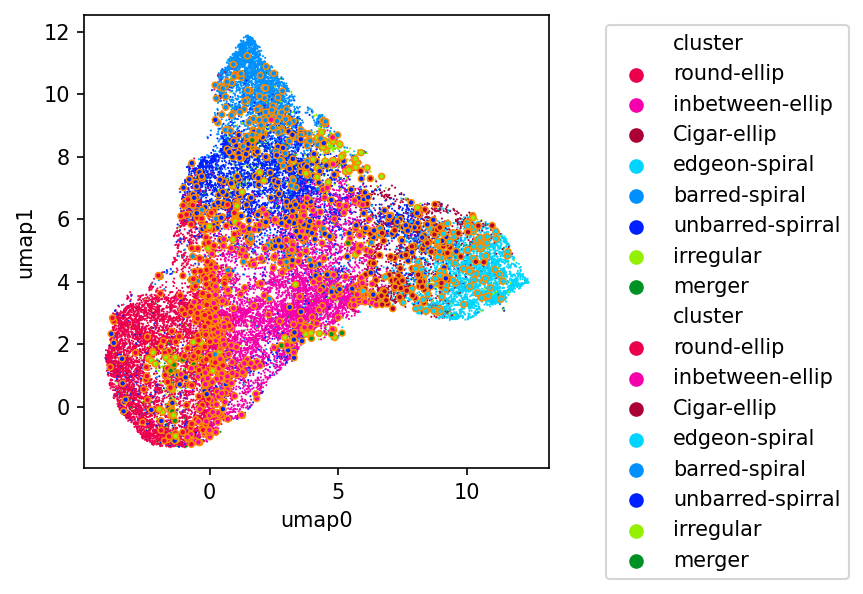

In [111]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(x='umap0',y='umap1',data=info,hue='cluster',
                hue_order=hueorder,linewidth=0,s=1,palette=colordic)
sns.scatterplot(x='umap0',y='umap1',data=info[info['vitTresF']==1],hue='cluster',edgecolor='darkorange',
                hue_order=hueorder,s=8,palette=colordic)
plt.legend(bbox_to_anchor=(1.1,1))

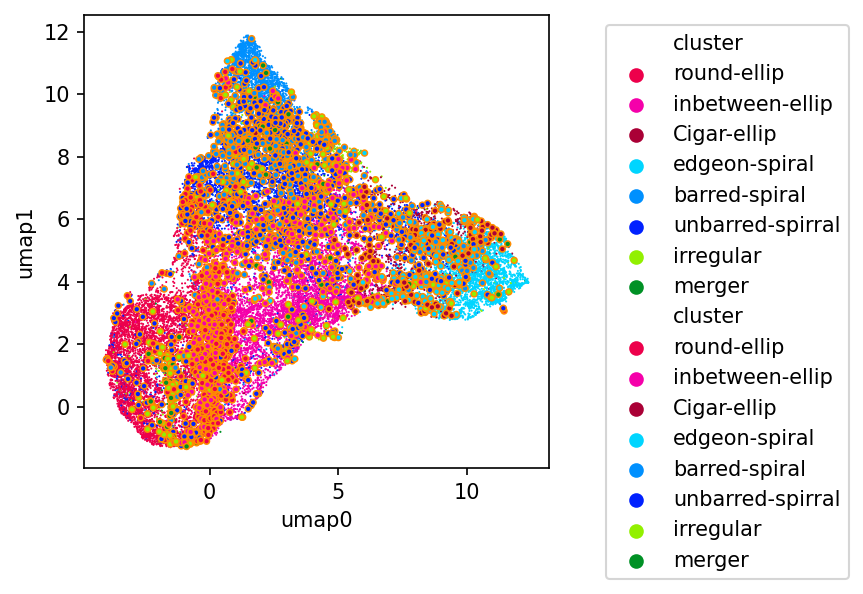

In [106]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(x='umap0',y='umap1',data=info,hue='cluster',
                hue_order=hueorder,linewidth=0,s=1,palette=colordic, legend='full')
sns.scatterplot(x='umap0',y='umap1',data=info[info['vitFresT']==1],hue='cluster',edgecolor='darkorange',
                hue_order=hueorder,s=8,palette=colordic, legend='full')
plt.legend(bbox_to_anchor=(1.1,1))

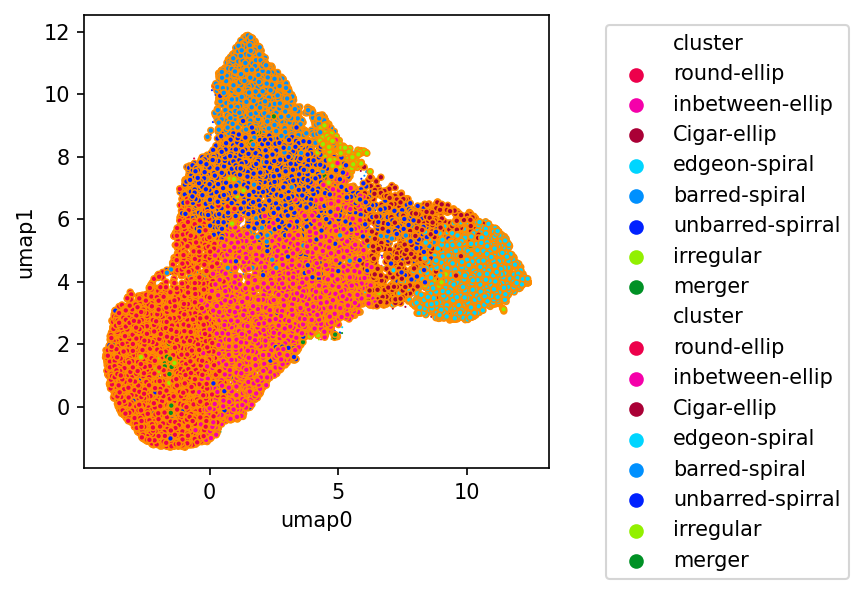

In [112]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(x='umap0',y='umap1',data=info,hue='cluster',
                hue_order=hueorder,linewidth=0,s=1,palette=colordic, legend='full')
sns.scatterplot(x='umap0',y='umap1',data=info[info['vitTresT']==1],hue='cluster',edgecolor='darkorange',
                hue_order=hueorder,s=8,palette=colordic, legend='full')
plt.legend(bbox_to_anchor=(1.1,1))

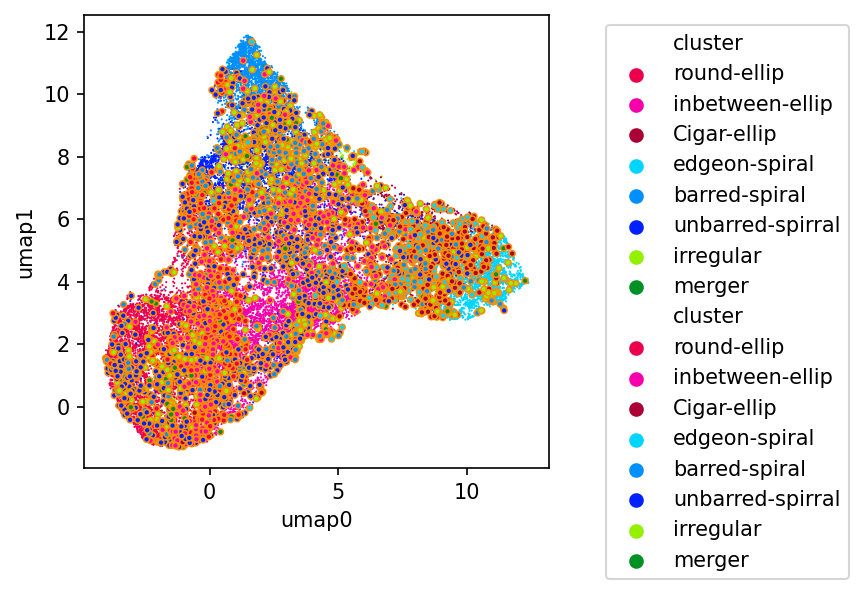

In [107]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(x='umap0',y='umap1',data=info,hue='cluster',
                hue_order=hueorder,linewidth=0,s=1,palette=colordic, legend='full')
sns.scatterplot(x='umap0',y='umap1',data=info[info['vitFresF']==1],hue='cluster',edgecolor='darkorange',
                hue_order=hueorder,s=8,palette=colordic, legend='full')
plt.legend(bbox_to_anchor=(1.1,1))

In [ ]:
df=pd.read_csv('/cndd2/jchien/project/transformer/lin_test_f128.csv')
df['label']=df['label'].map(typedic)
clusters=df['label'].values
df=df.drop(columns=['galaxy_id','label'])
data=df.values
ns=[10,20,30,50,100]
ms=['euclidean','cosine','correlation','minkowski']
fig,axs=plt.subplots(4,5,figsize=(10,8),dpi=150,sharex=True,sharey=True)
for i in range(len(ms)):
    for j in range(len(ns)):
        embedding = umap.UMAP(n_neighbors=ns[j],n_components=2, metric=ms[i]).fit_transform(data)
        umapembed=pd.DataFrame({'clusters':clusters,'umap0':embedding[:,0],'umap1':embedding[:,1]})
        ax=axs[i,j]
        sns.scatterplot(x='umap0',y='umap1',data=umapembed,hue='clusters',ax=ax,
                        hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                        linewidth=0,s=1,palette=colordic, legend='full')
        ax.legend([],[], frameon=False)
        ax.set_title(str(ms[i])+' '+str(ns[j]))
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels,bbox_to_anchor=(1.1, 1))

plt.suptitle('lin_test_f128')
plt.tight_layout()

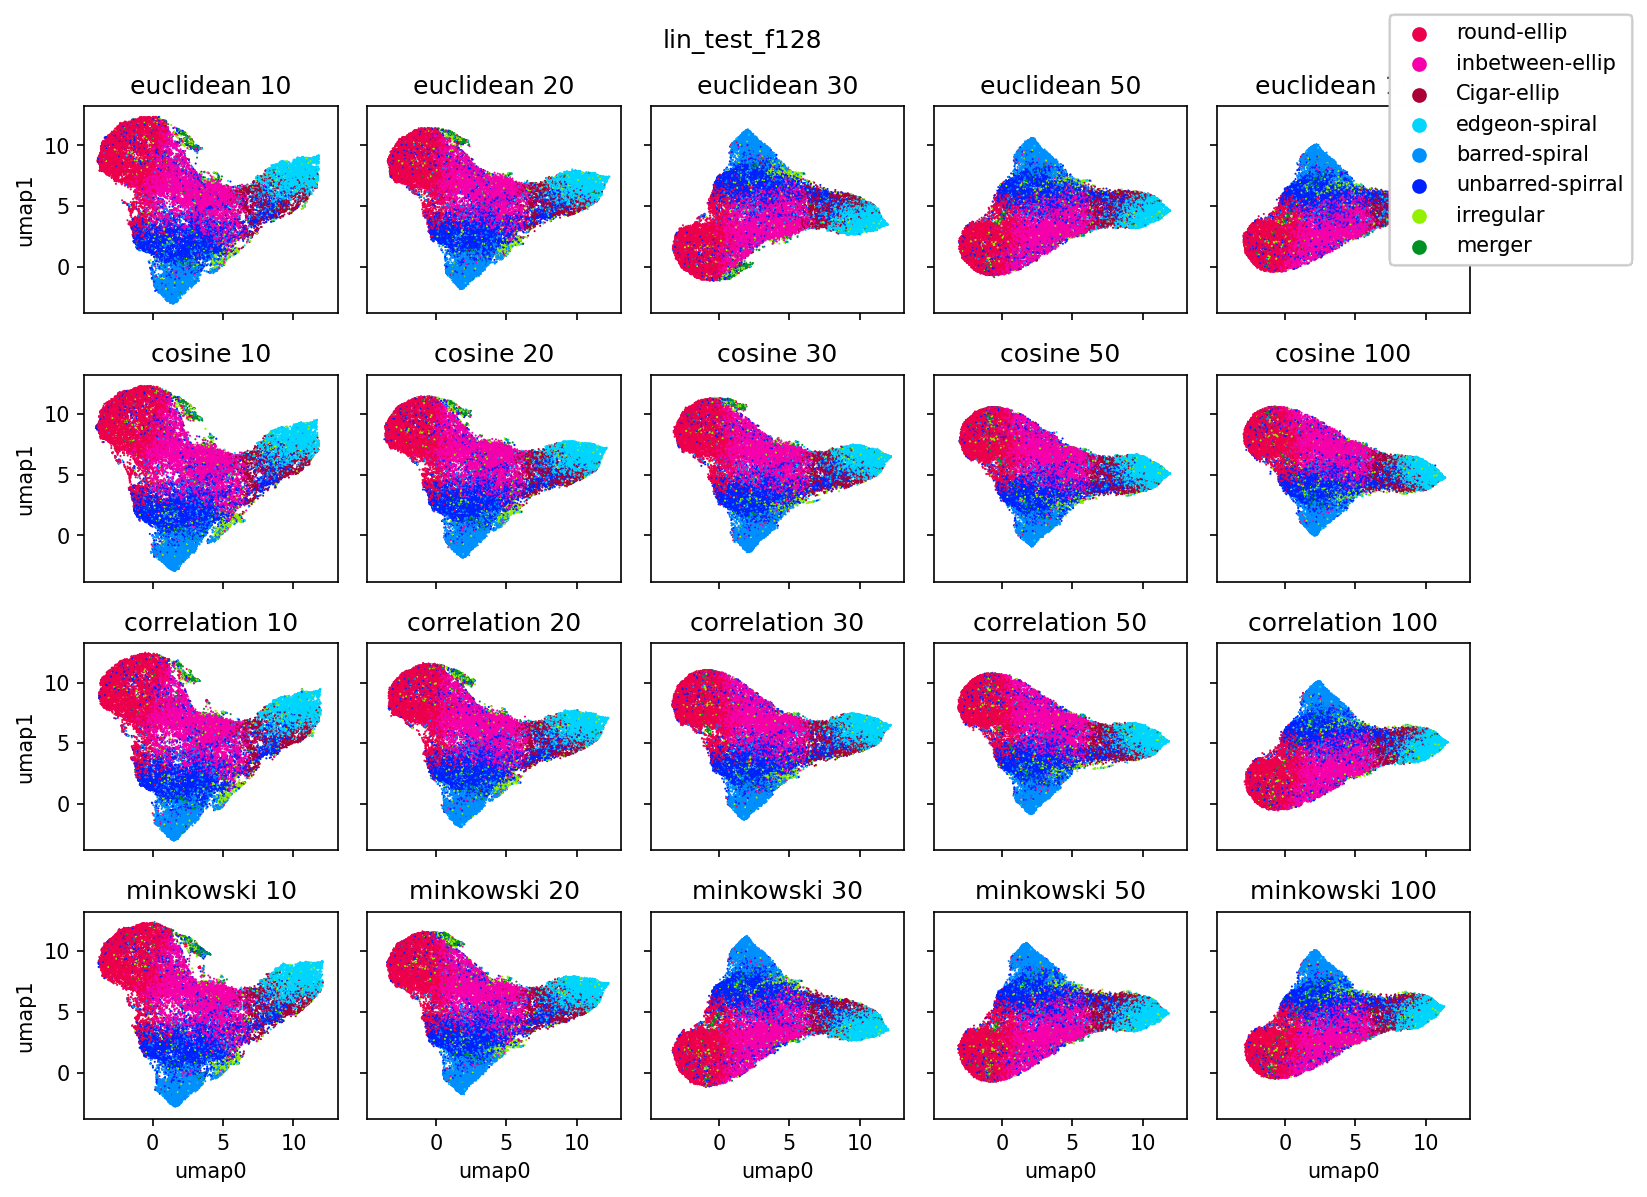

In [22]:
df=pd.read_csv('/cndd2/jchien/project/transformer/lin_test_f128.csv')
df['label']=df['label'].map(typedic)
clusters=df['label'].values
df=df.drop(columns=['galaxy_id','label'])
data=df.values
ns=[10,20,30,50,100]
ms=['euclidean','cosine','correlation','minkowski']
fig,axs=plt.subplots(4,5,figsize=(10,8),dpi=150,sharex=True,sharey=True)
for i in range(len(ms)):
    for j in range(len(ns)):
        embedding = umap.UMAP(n_neighbors=ns[j],n_components=2, metric=ms[i]).fit_transform(data)
        umapembed=pd.DataFrame({'clusters':clusters,'umap0':embedding[:,0],'umap1':embedding[:,1]})
        ax=axs[i,j]
        sns.scatterplot(x='umap0',y='umap1',data=umapembed,hue='clusters',ax=ax,
                        hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                        linewidth=0,s=1,palette=colordic, legend='full')
        ax.legend([],[], frameon=False)
        ax.set_title(str(ms[i])+' '+str(ns[j]))
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels,bbox_to_anchor=(1.1, 1))

plt.suptitle('lin_test_f128')
plt.tight_layout()

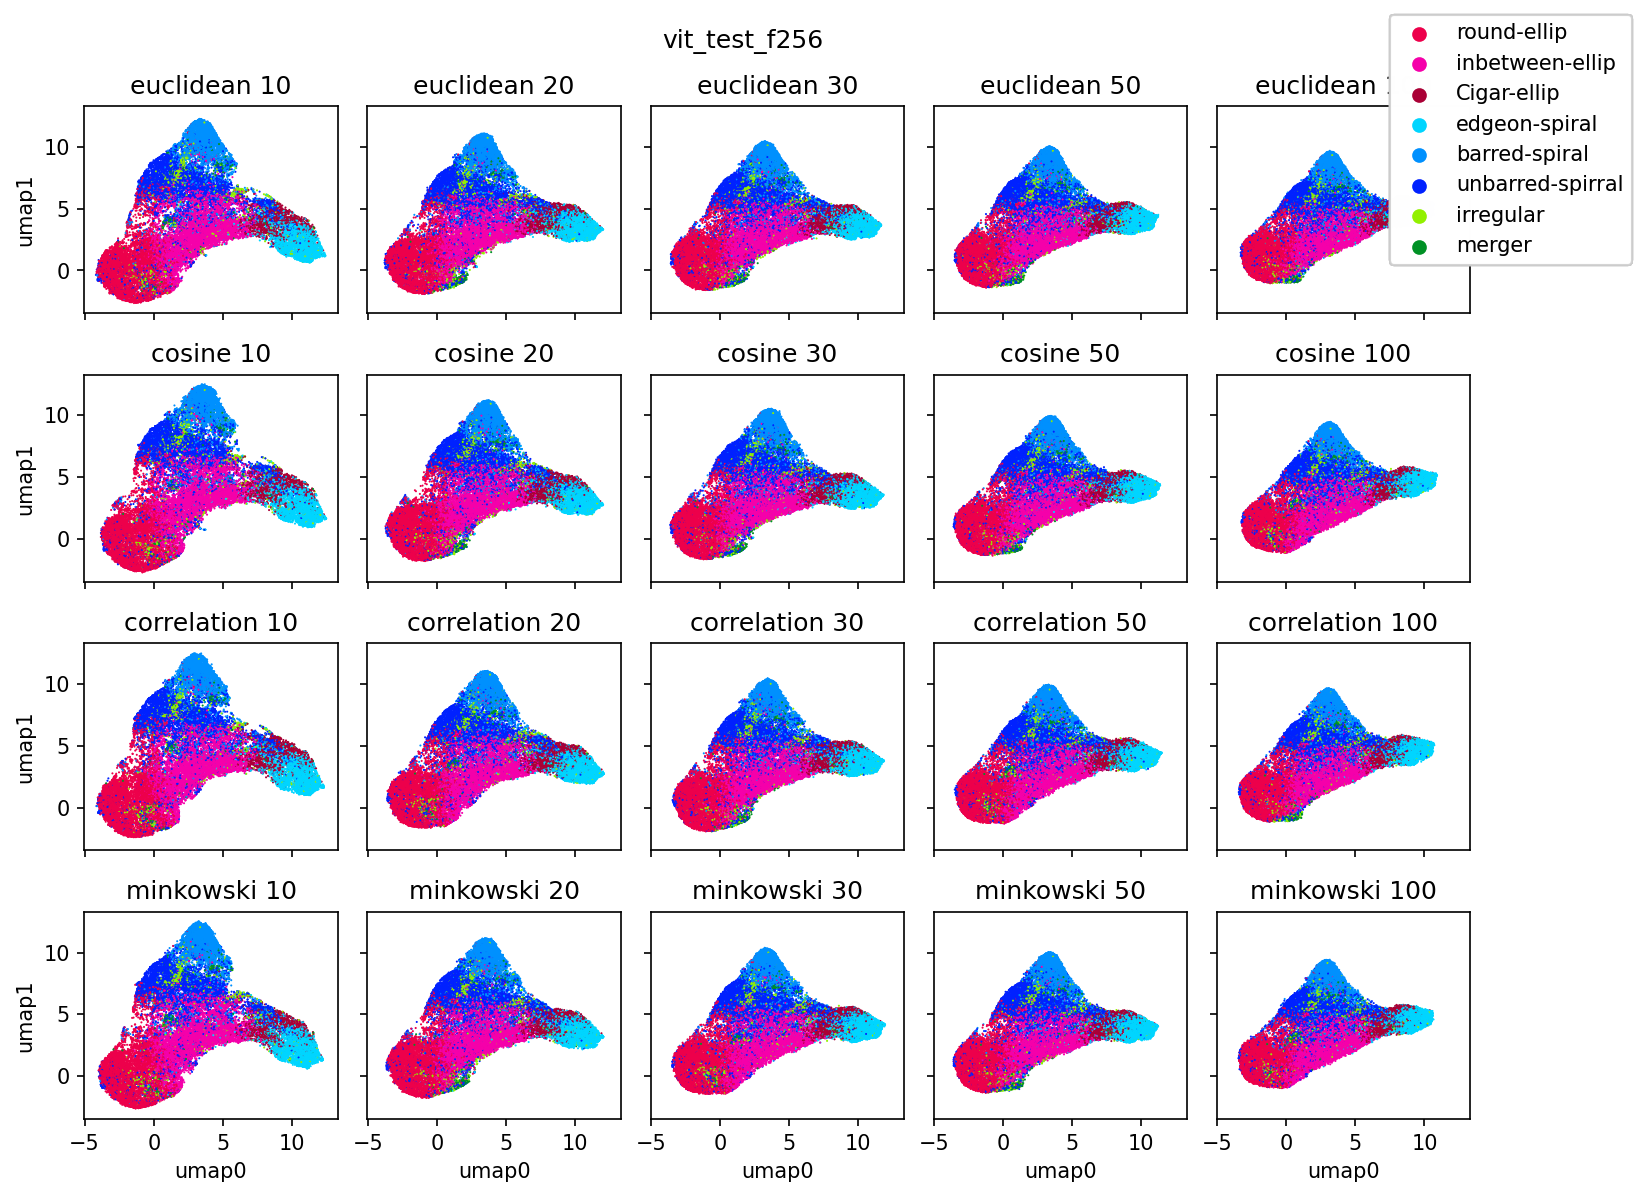

In [23]:
df=pd.read_csv('/cndd2/jchien/project/transformer/vit_test_f256.csv')
df['label']=df['label'].map(typedic)
clusters=df['label'].values
df=df.drop(columns=['galaxy_id','label'])
data=df.values
ns=[10,20,30,50,100]
ms=['euclidean','cosine','correlation','minkowski']
fig,axs=plt.subplots(4,5,figsize=(10,8),dpi=150,sharex=True,sharey=True)
for i in range(len(ms)):
    for j in range(len(ns)):
        embedding = umap.UMAP(n_neighbors=ns[j],n_components=2, metric=ms[i]).fit_transform(data)
        umapembed=pd.DataFrame({'clusters':clusters,'umap0':embedding[:,0],'umap1':embedding[:,1]})
        ax=axs[i,j]
        sns.scatterplot(x='umap0',y='umap1',data=umapembed,hue='clusters',ax=ax,
                        hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                        linewidth=0,s=1,palette=colordic, legend='full')
        ax.legend([],[], frameon=False)
        ax.set_title(str(ms[i])+' '+str(ns[j]))
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels,bbox_to_anchor=(1.1, 1))
plt.suptitle('vit_test_f256')
plt.tight_layout()


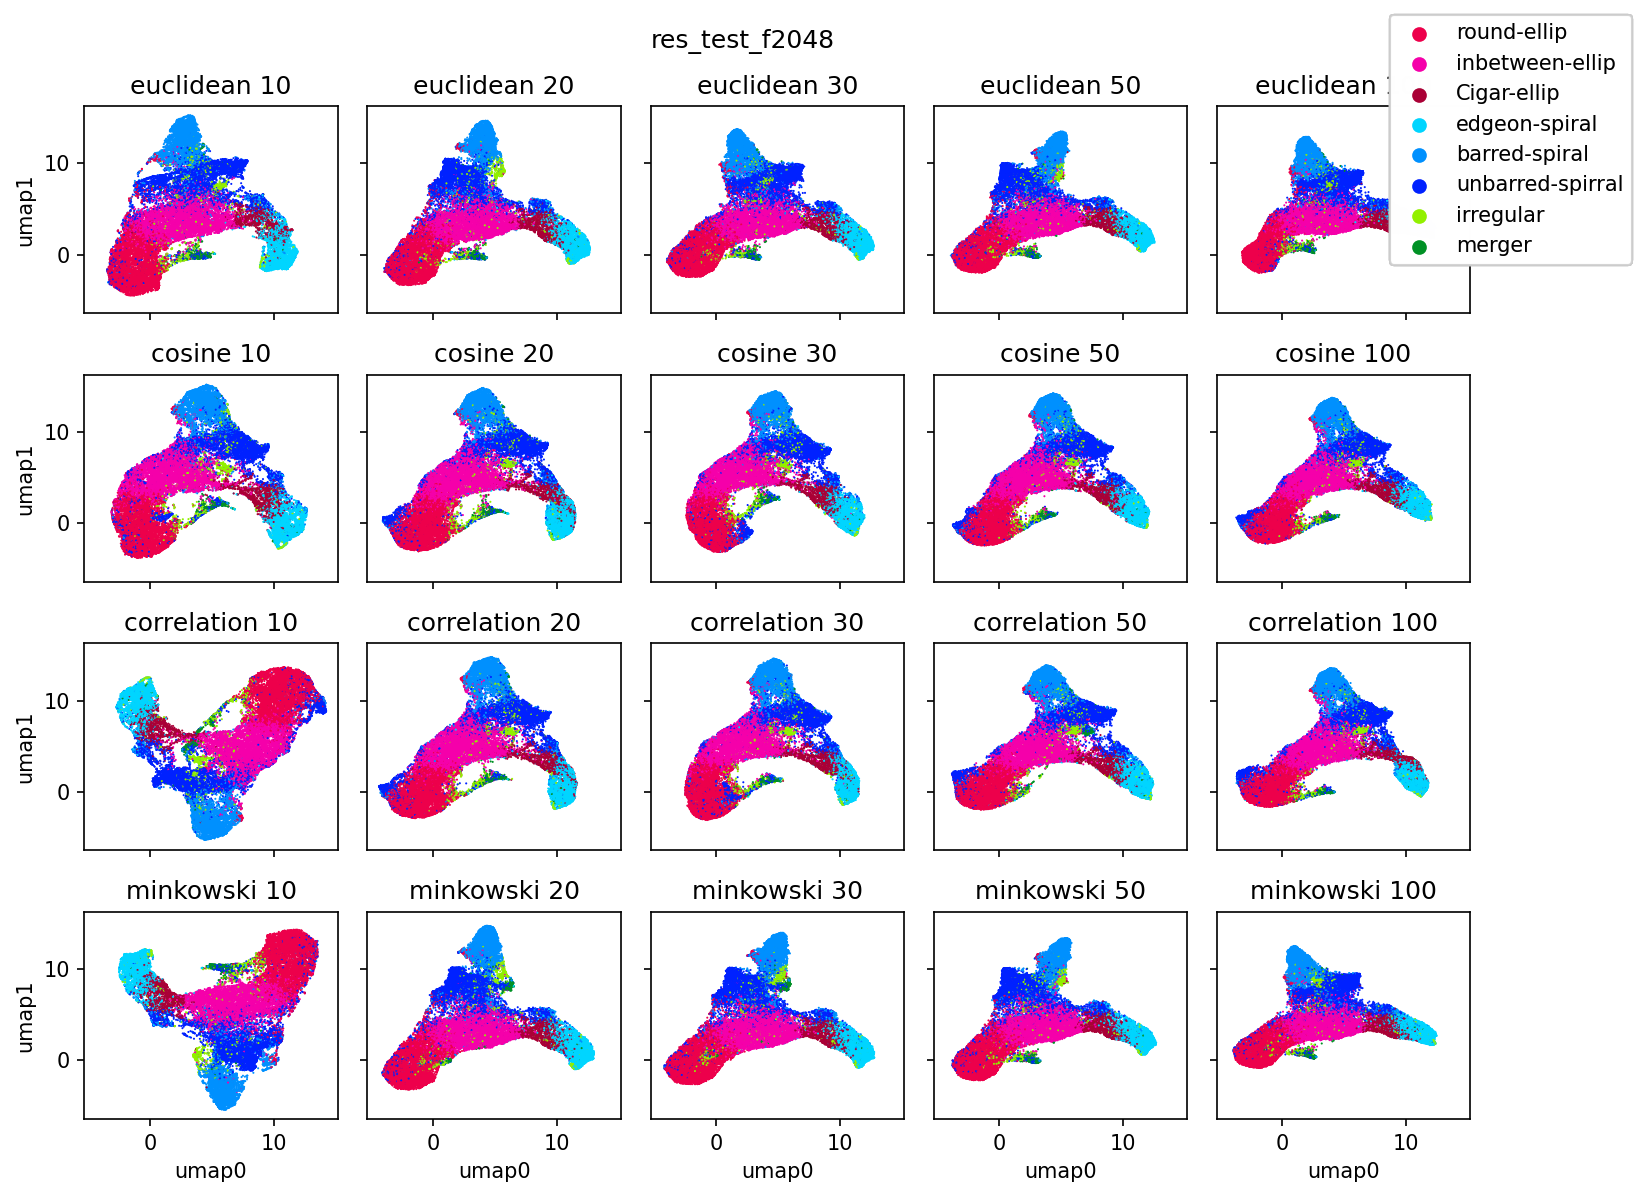

In [24]:
df=pd.read_csv('/cndd2/jchien/project/transformer/res_test_f2048.csv')
df['label']=df['label'].map(typedic)
clusters=df['label'].values
df=df.drop(columns=['galaxy_id','label'])
data=df.values
ns=[10,20,30,50,100]
ms=['euclidean','cosine','correlation','minkowski']
fig,axs=plt.subplots(4,5,figsize=(10,8),dpi=150,sharex=True,sharey=True)
for i in range(len(ms)):
    for j in range(len(ns)):
        embedding = umap.UMAP(n_neighbors=ns[j],n_components=2, metric=ms[i]).fit_transform(data)
        umapembed=pd.DataFrame({'clusters':clusters,'umap0':embedding[:,0],'umap1':embedding[:,1]})
        ax=axs[i,j]
        sns.scatterplot(x='umap0',y='umap1',data=umapembed,hue='clusters',ax=ax,
                        hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                        linewidth=0,s=1,palette=colordic, legend='full')
        ax.legend([],[], frameon=False)
        ax.set_title(str(ms[i])+' '+str(ns[j]))
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels,bbox_to_anchor=(1.1, 1))

plt.suptitle('res_test_f2048')
plt.tight_layout()

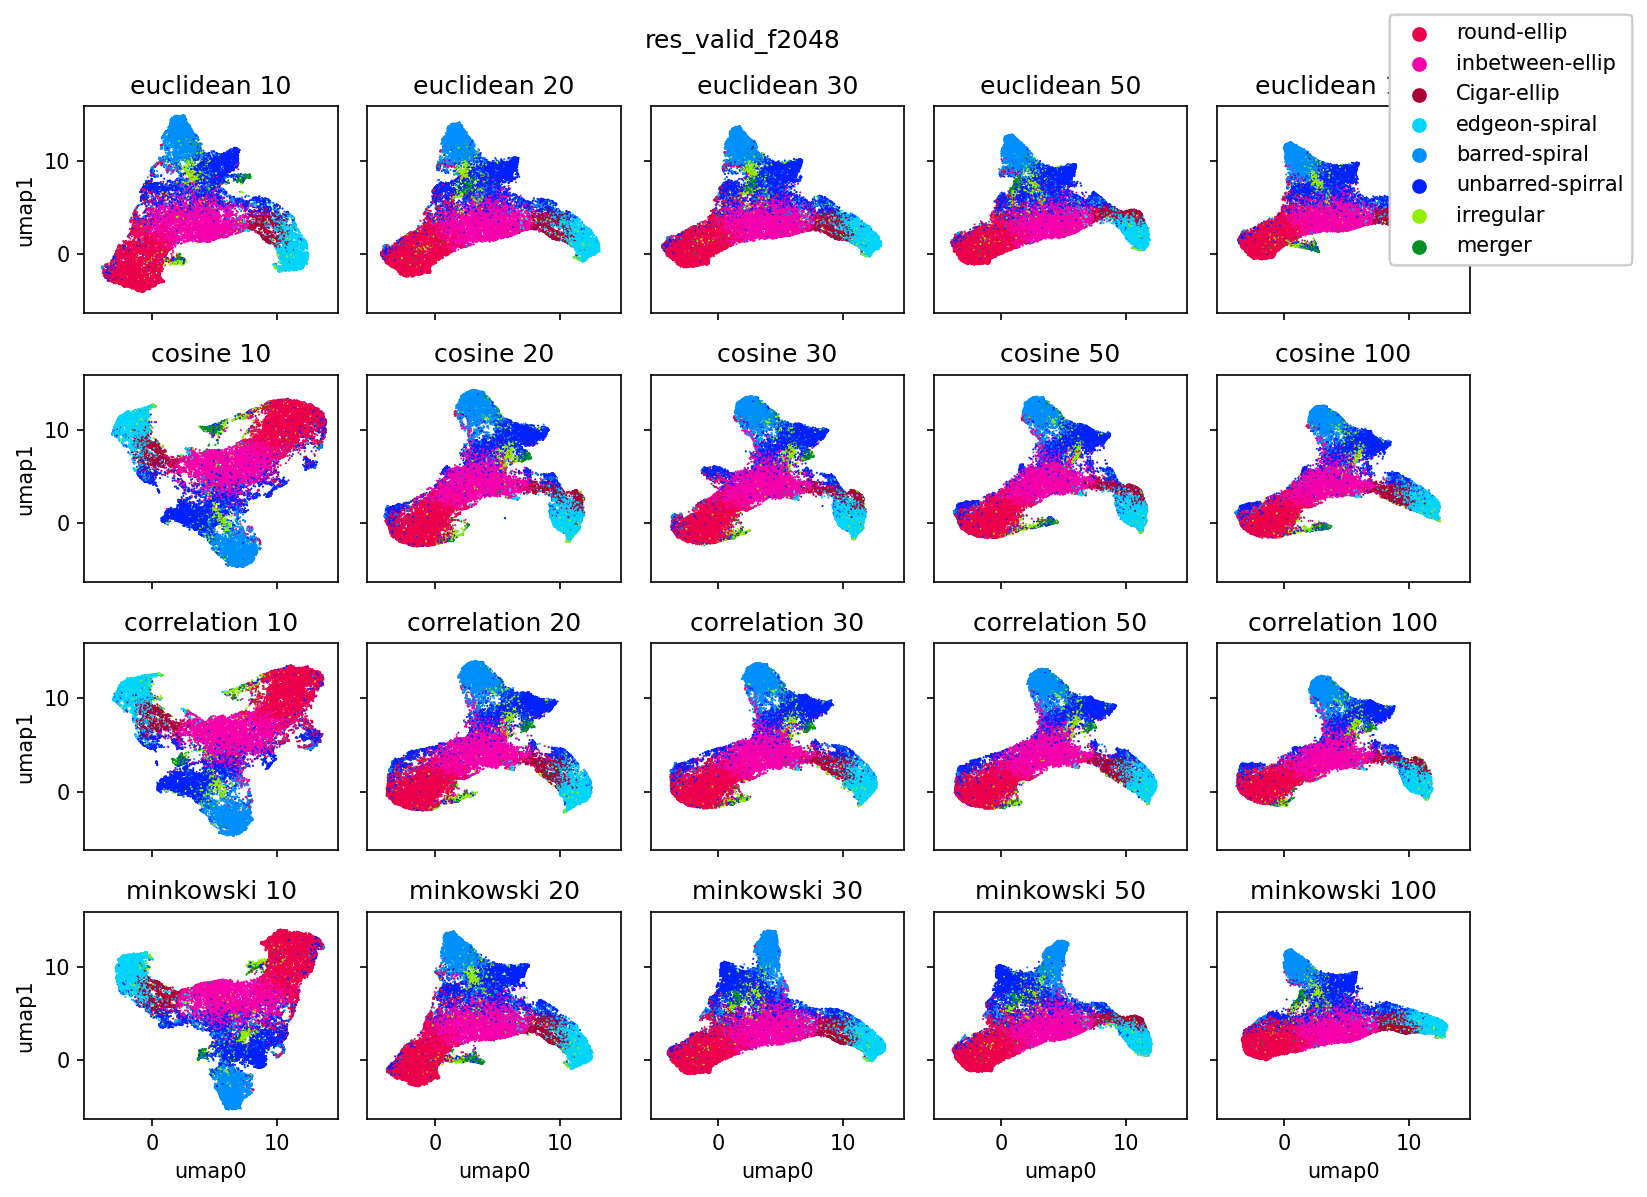

In [33]:
df=pd.read_csv('/cndd2/jchien/project/transformer/res_valid_f2048.csv')
df
df['label']=df['label'].map(typedic)
clusters=df['label'].values
df=df.drop(columns=['galaxy_id','label'])
data=df.values
ns=[10,20,30,50,100]
ms=['euclidean','cosine','correlation','minkowski']
fig,axs=plt.subplots(4,5,figsize=(10,8),dpi=150,sharex=True,sharey=True)
for i in range(len(ms)):
    for j in range(len(ns)):
        embedding = umap.UMAP(n_neighbors=ns[j],n_components=2, metric=ms[i]).fit_transform(data)
        umapembed=pd.DataFrame({'clusters':clusters,'umap0':embedding[:,0],'umap1':embedding[:,1]})
        ax=axs[i,j]
        sns.scatterplot(x='umap0',y='umap1',data=umapembed,hue='clusters',ax=ax,
                        hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                        linewidth=0,s=1,palette=colordic, legend='full')
        ax.legend([],[], frameon=False)
        ax.set_title(str(ms[i])+' '+str(ns[j]))
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels,bbox_to_anchor=(1.1, 1))

plt.suptitle('res_valid_f2048')
plt.tight_layout()

## tmp

In [ ]:
# typedic={0:'round-ellip',1:'inbetween-ellip',2:'Cigar-ellip',3:'edgeon-spiral',4:'barred-spiral',5:'unbarred-spirral',6:'irregular',7:'merger'}
# colordic={'round-ellip':'#ED004B','inbetween-ellip':"#F500AA",'Cigar-ellip':'#AA0036',
#           'edgeon-spiral':'#00d5ff','barred-spiral':'#0090FE','unbarred-spirral':'#0021FF',
#           'irregular':'#92F000','merger':'#009125'}
# df=pd.read_csv('/cndd2/jchien/project/transformer/res_test_f2048.csv')
# df['label']=df['label'].map(typedic)
# clusters=df['label'].values
# df=df.drop(columns=['galaxy_id','label'])
# data=df.values
# embedding = umap.UMAP().fit_transform(data)
# umapembed=pd.DataFrame({'labels':labels,'umap0':embedding[:,0],'umap1':embedding[:,1]})
# sns.scatterplot(x='umap0',y='umap1',data=umapembed,hue=labels,
#                 hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
#                 linewidth=0,s=1,palette='viridis', legend='full')
# plt.legend(bbox_to_anchor=(0.98, 1))

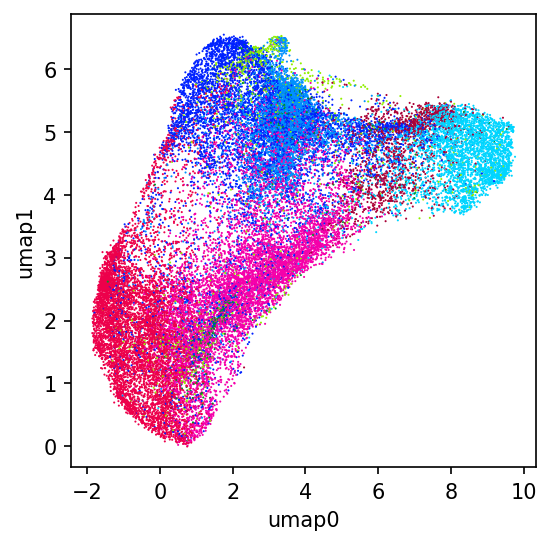

In [24]:
plt.figure(figsize=(4,4),dpi=150)
umapembed=pd.DataFrame({'clusters':clusters,'umap0':embedding[:,0],'umap1':embedding[:,1]})
sns.scatterplot(x='umap0',y='umap1',data=umapembed,hue='clusters',
                hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                linewidth=0,s=1,palette=colordic, legend='full')
# plt.legend(bbox_to_anchor=(0.98, 1))
plt.legend([],[], frameon=False)

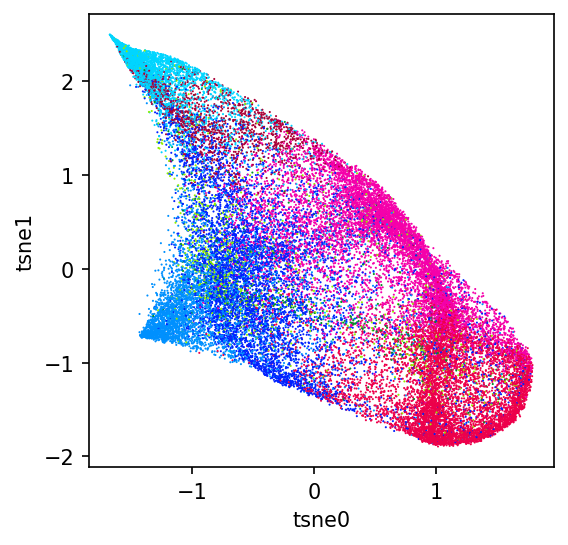

In [5]:
# from sklearn.manifold import TSNE
# embedding= TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250).fit_transform(data)

plt.figure(figsize=(4,4),dpi=150)
tsneembed=pd.DataFrame({'clusters':clusters,'tsne0':embedding[:,0],'tsne1':embedding[:,1]})
sns.scatterplot(x='tsne0',y='tsne1',data=tsneembed,hue='clusters',
                hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                linewidth=0,s=1,palette=colordic, legend='full')
# plt.legend(bbox_to_anchor=(0.98, 1))
plt.legend([],[], frameon=False)

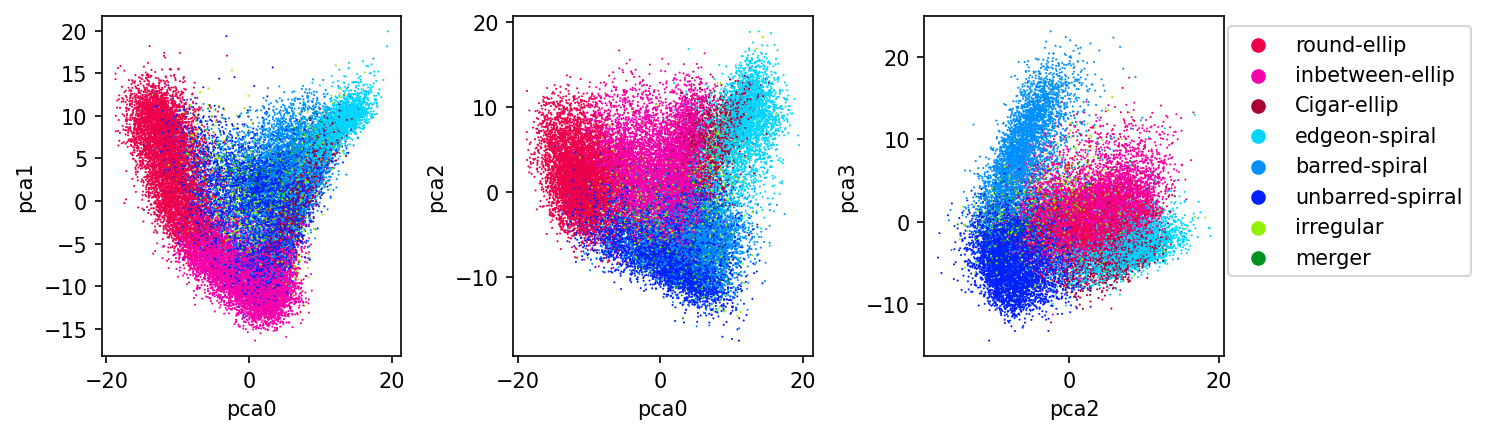

In [8]:
fig,axs=plt.subplots(1,3,figsize=(10,3),dpi=150)
pca = PCA(n_components=5).fit_transform(data)
pcaembed=pd.DataFrame({'clusters':clusters,'pca0':pca[:,0],'pca1':pca[:,1],'pca2':pca[:,2],'pca3':pca[:,3]})
ax=axs[0]
sns.scatterplot(x='pca0',y='pca1',data=pcaembed,hue=clusters,ax=ax,
                hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                linewidth=0,s=1,palette=colordic)
ax.legend([],[], frameon=False)

ax=axs[1]
sns.scatterplot(x='pca0',y='pca2',data=pcaembed,hue=clusters,ax=ax,
                hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                linewidth=0,s=1,palette=colordic)
ax.legend([],[], frameon=False)
ax=axs[2]
sns.scatterplot(x='pca2',y='pca3',data=pcaembed,hue=clusters,ax=ax,
                hue_order=['round-ellip','inbetween-ellip','Cigar-ellip','edgeon-spiral','barred-spiral','unbarred-spirral','irregular','merger'],
                linewidth=0,s=1,palette=colordic, legend='full')
ax.legend(bbox_to_anchor=(0.98, 1))
plt.tight_layout()